In [2]:
#importing data analysis packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [167]:
df=pd.read_csv('credit_card_churn.csv')

In [168]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [169]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [170]:
#lets remove last 2 columns since it serves no purpose according to the data description
df=df.iloc[:,:-2]

In [171]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [173]:
#since there are no null values lets check for duplicates
df.duplicated().sum()

np.int64(0)

so there are no duplicates in data

In [174]:
#lets check unique value for all columns
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [175]:
#lets check for the categorical columns
df.select_dtypes(include='object').nunique()

Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

In [176]:
cat_cols=df.select_dtypes(include='object').columns

In [177]:
df.describe()


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [178]:
#since the dashboard already shows overall insights about the dataset Lets do some EDA to get more insights



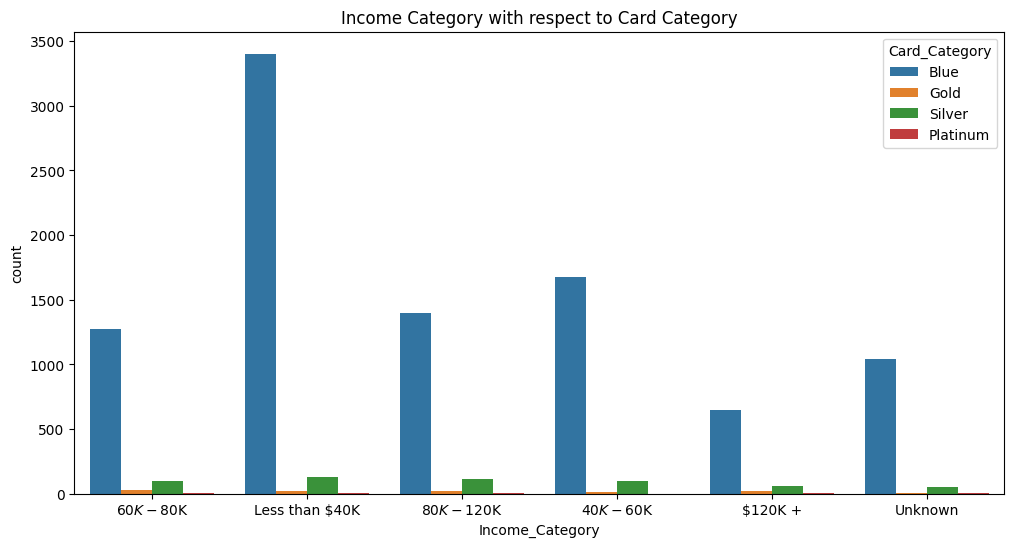

In [179]:
#lets see count of income categories with respect to card category
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Income_Category',hue='Card_Category')
plt.title('Income Category with respect to Card Category')
plt.show()


Observations
Here we see that regardless of income , most people prefer Blue card

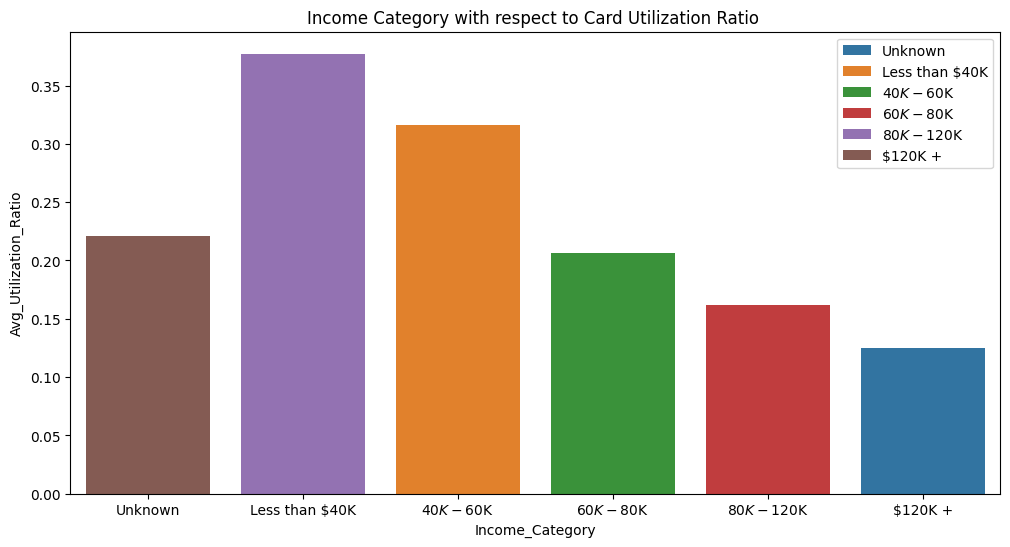

In [180]:
#lets see cart utilization ratio with respect to card category
plt.figure(figsize=(12,6))
df1=df.groupby('Income_Category').aggregate({'Avg_Utilization_Ratio':'mean'})
cols=['Unknown',"Less than $40K","$40K - $60K","$60K - $80K","$80K - $120K","$120K +"]
sns.barplot(data=df1,x=df1.index,y='Avg_Utilization_Ratio',order=cols,hue=cols)
plt.title('Income Category with respect to Card Utilization Ratio ')
plt.show()

Except for Unknown, as income range increases, Credit_Utilization_Ration decreases

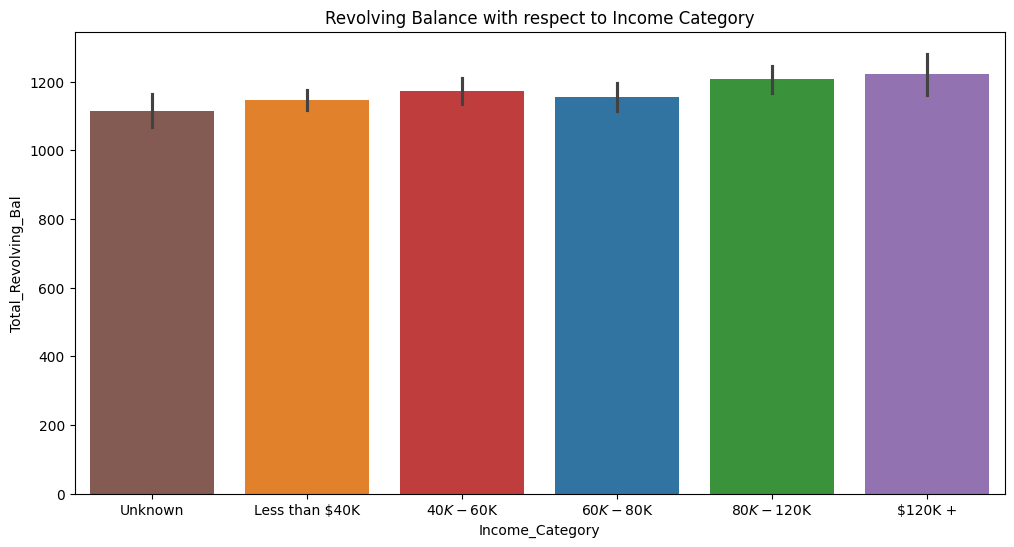

In [181]:
#lets see about the revolving balance with respect to Income category
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='Income_Category',y='Total_Revolving_Bal',order=cols,hue='Income_Category')
plt.title('Revolving Balance with respect to Income Category')
plt.show()

No relation found as revolving balance is almost same regardless of Income categories

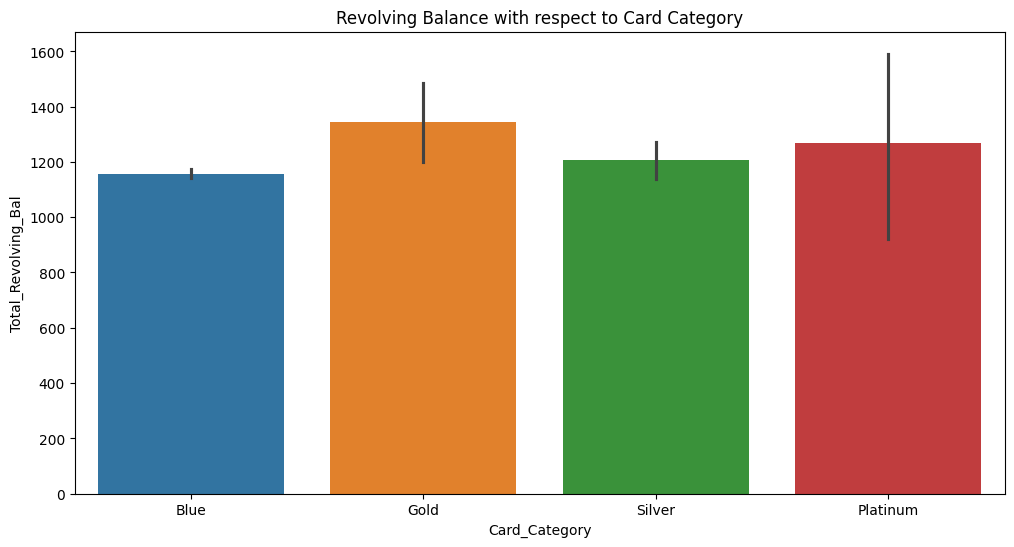

In [182]:
#Revolving balance with respect to Card categories
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='Card_Category',y='Total_Revolving_Bal',hue='Card_Category')
plt.title('Revolving Balance with respect to Card Category')
plt.show()



Gold and Platinum Credit cards have slightly more revolving balance than rest

In [183]:
#Now lets perform some bi-variate analysis on Attrition_Flag
Attrited_Customer=df[df['Attrition_Flag']=='Attrited Customer']
Attrited_Customer.reset_index(drop=True,inplace=True)
Attrited_Customer.head()    

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
1,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
2,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
3,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
4,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000


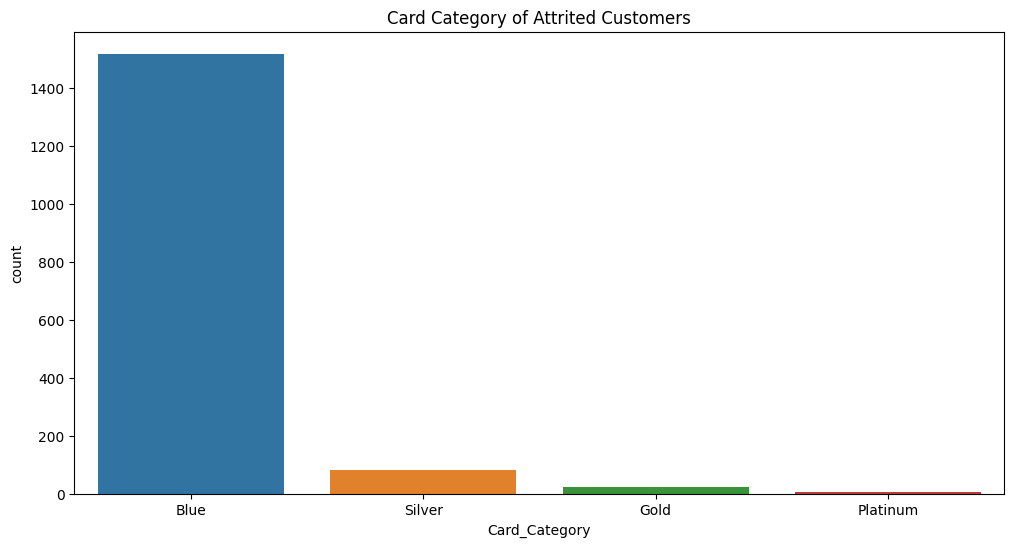

In [184]:
#analysis based on card category
plt.figure(figsize=(12,6))
sns.countplot(data=Attrited_Customer,x='Card_Category',hue='Card_Category')
plt.title('Card Category of Attrited Customers')
plt.show()


Although we see here that Blue card customer churn more but we need to remember that 94% of the customer here have Blue card

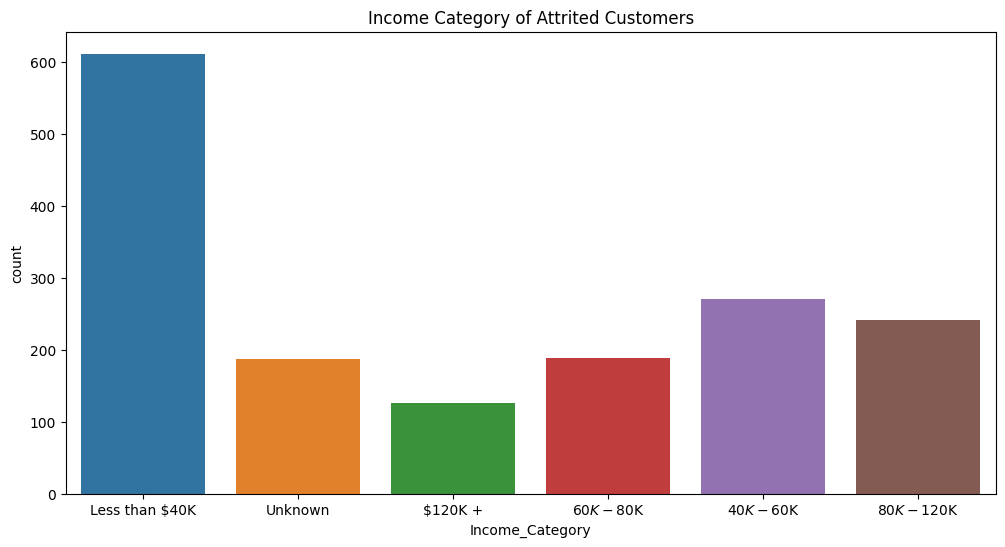

In [185]:
#now lets check based on income category
plt.figure(figsize=(12,6))
sns.countplot(data=Attrited_Customer,x='Income_Category',hue='Income_Category')
plt.title('Income Category of Attrited Customers')
plt.show()

People who have income less than $40k are likely to churn


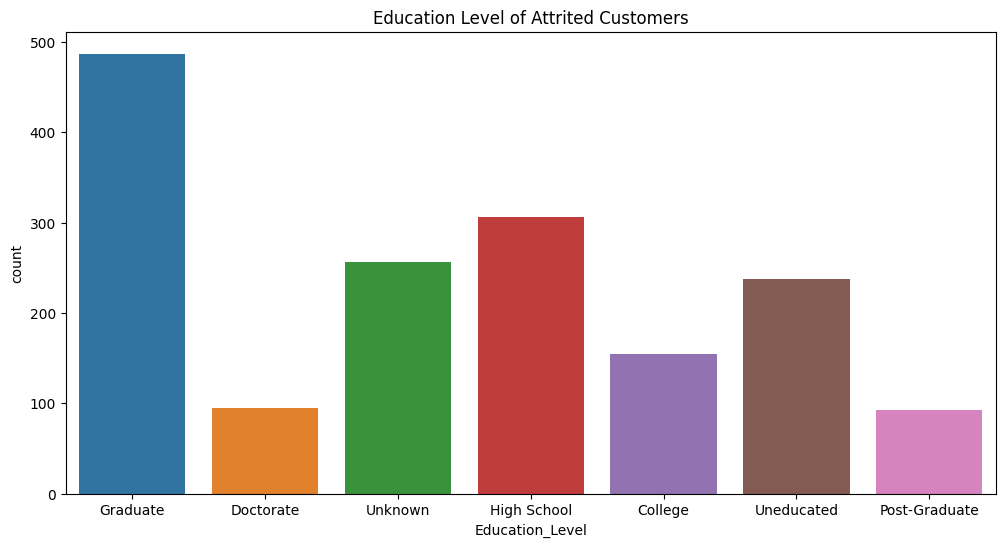

In [186]:
#now lets focus on education levels
plt.figure(figsize=(12,6))
sns.countplot(data=Attrited_Customer,x='Education_Level',hue='Education_Level')
plt.title('Education Level of Attrited Customers')
plt.show()

Graduate are very high churn while Doctorate and Post-Graduate are low

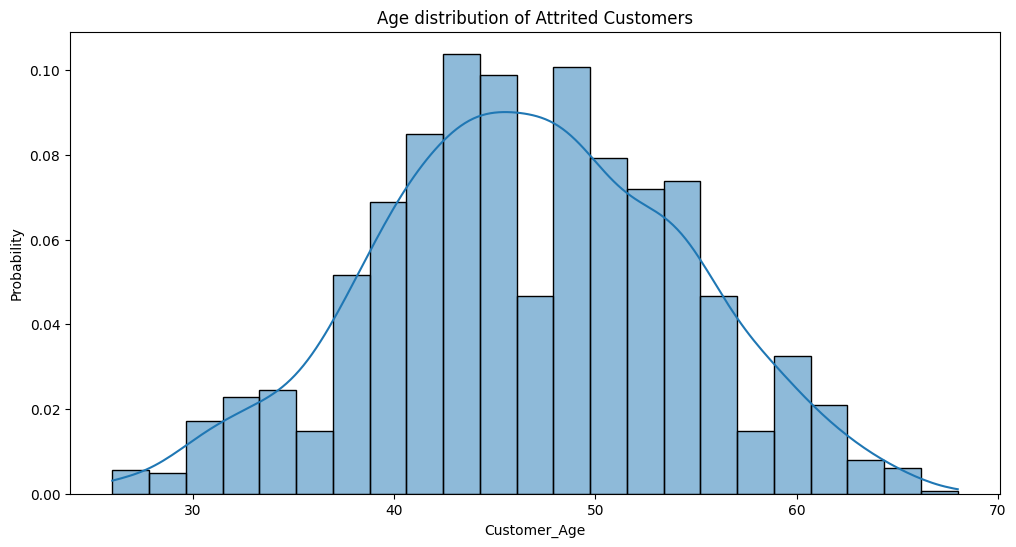

In [187]:
#lets see based on age
plt.figure(figsize=(12,6))
sns.histplot(data=Attrited_Customer,x='Customer_Age',kde=True,stat='probability')
plt.title('Age distribution of Attrited Customers')
plt.show()


Customers between age 40 and 50 are very high churn

In [ ]:
#lets go onto model Building and import necessary packages
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score

#since trees and boosting algorithms are best for imbalanced datasets lets use them
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

from tqdm import tqdm




In [189]:
#applying label encoding to the categorical columns
le=LabelEncoder()
label_encoders = {col: LabelEncoder() for col in cat_cols}


for col in cat_cols:
    label_encoders[col].fit(df[col])

# Transform the columns
for col in cat_cols:
    df[col] = label_encoders[col].transform(df[col])

In [190]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [191]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Attrition_Flag',axis=1),df['Attrition_Flag'],test_size=0.2,random_state=42) 

In [192]:
X_test_Client=X_test['CLIENTNUM']
X_train.drop('CLIENTNUM',axis=1,inplace=True)
X_test.drop('CLIENTNUM',axis=1,inplace=True)

In [94]:
# Dictionary of models
models = { "Logistic Regression": LogisticRegression(),
                "Random Forest": RandomForestClassifier(),
                "Gradient Boosting": GradientBoostingClassifier(),
                "Ada Boosting": AdaBoostClassifier(),
                "Decision Tree": DecisionTreeClassifier()}


In [108]:
# List to store model results
results = []

# Model training with tqdm
for name, model in tqdm(models.items(), desc="Training models", total=len(models)):

    # Train model
    model.fit(X_train, y_train)

    # Model score
    score = model.score(X_test, y_test)
    recall=cross_val_score(model,X_train,y_train,scoring='recall',cv=5).mean()
    precision=cross_val_score(model,X_train,y_train,scoring='precision',cv=5).mean()
    f1=cross_val_score(model,X_train,y_train,scoring='f1',cv=5).mean()

    
    # Model prediction
    model_pred = model.predict(X_test)

    # Append results to the list
    results.append({"Model": name, "Accuracy": score, "Recall": recall, "Precision": precision, "F1": f1})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Sort DataFrame by accuracy
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Display the sorted DataFrame
print(results_df)

Training models: 100%|██████████| 5/5 [00:33<00:00,  6.63s/it]

                 Model  Accuracy    Recall  Precision        F1
2    Gradient Boosting  0.965449  0.988973   0.971129  0.979966
1        Random Forest  0.961500  0.988237   0.966395  0.977952
3         Ada Boosting  0.950642  0.978828   0.971121  0.974956
4        Decision Tree  0.931392  0.957654   0.960655  0.959709
0  Logistic Regression  0.876111  0.959418   0.897794  0.927568


From result we see that Gradient boosting and Random Forest have high scores in all categories so lets take those 2 and perform hyper parameter tuning to see if we can improve it further

In [102]:


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


gb_model = GradientBoostingClassifier()
rf_model = RandomForestClassifier()

# Perform Grid Search for Gradient Boosting
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train, y_train)

# Perform Grid Search for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and scores
print("Best parameters for Gradient Boosting:", gb_grid_search.best_params_)
print("Best score for Gradient Boosting:", gb_grid_search.best_score_)

print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best score for Random Forest:", rf_grid_search.best_score_)

# Get the best models
best_gb_model = gb_grid_search.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters for Gradient Boosting: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Gradient Boosting: 0.9728430256740759
Best parameters for Random Forest: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best score for Random Forest: 0.9398846791997477


Again Gradient Boosting came on top Now lets create a get the predictions from the best scoring model along with its hyper parameters and store its value


In [193]:

y_pred=best_gb_model.predict(X_test)

# Predict probabilities on the test set
gb_pred_proba = best_gb_model.predict_proba(X_test)

gb_pred_proba=gb_pred_proba[:,1]*100




In [194]:
#lets create a Dataframe to store the results for power bi dashboard
Churn_Output=X_test.copy()
Churn_Output['ClientNum']=X_test_Client


In [195]:
Churn_Output['Predictions - Churn or Not']=y_pred
Churn_Output['Predictions- Probability to Churn']=gb_pred_proba

Churn_Output['Predictions - Churn or Not Desc'] = np.where(y_pred == 1, "Attrition", "Existing")
Churn_Output['Actual_Result']=np.where(y_test == 1, "Attrition", "Existing")

In [196]:
cat_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [197]:
#restore categorical values 
for col in cat_cols[1:]:
    Churn_Output[col] = label_encoders[col].inverse_transform(Churn_Output[col])


In [198]:
Churn_Output

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,ClientNum,Predictions - Churn or Not,Predictions- Probability to Churn,Predictions - Churn or Not Desc,Actual_Result
3781,48,F,3,Uneducated,Single,Less than $40K,Blue,39,4,3,...,0.703,3734,64,0.882,0.504,719455083,1,99.736723,Attrition,Attrition
2922,59,M,1,Uneducated,Single,Less than $40K,Blue,53,5,5,...,0.706,4010,79,0.717,0.716,773503308,1,99.951697,Attrition,Attrition
5070,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,4,3,...,0.879,4727,67,0.914,0.569,715452408,1,99.881812,Attrition,Attrition
7246,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,4,2,...,0.940,4973,74,0.850,0.317,711264033,1,99.449274,Attrition,Attrition
623,42,M,3,Unknown,Single,$80K - $120K,Blue,33,3,3,...,0.524,1454,35,0.522,0.584,718943508,1,97.514836,Attrition,Attrition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,34,M,2,Graduate,Single,$80K - $120K,Blue,29,3,1,...,1.006,2650,69,0.865,0.125,814776033,1,99.813788,Attrition,Attrition
4705,35,F,1,College,Single,Less than $40K,Blue,25,2,2,...,0.820,2576,42,0.750,0.803,720444408,0,7.601111,Existing,Existing
8548,44,F,1,Uneducated,Divorced,Less than $40K,Blue,37,1,2,...,0.549,5220,75,0.829,0.221,720503508,1,99.811116,Attrition,Attrition
1346,27,M,0,Graduate,Single,$120K +,Blue,17,6,2,...,0.558,2094,36,0.333,0.155,721217283,1,97.904334,Attrition,Attrition


In [199]:
#save the results to a csv file
Churn_Output.to_csv('ChurnPredictionsOutput.csv',index=False)